<!-- ![](animation.gif) -->

# Introduction
In Previous [article](https://nbviewer.org/github/aminehd/AminehTechnicalWritings/blob/main/notebookes/NeuralNetWriting.ipynb#) I talked about classifier neural networks, specefically their feed forward and backward.

The reason we need feed backward is to run *Gradient decent* algorithm. The idea about Gradiant decent is that it moves the parameters and output of layers to such a small amount.
$$
W^{[i]} = W^{[i]} - α * dW^{[i]}
$$
Thus if we could plot the output of at each round of Gradient decent update, we could hopefully see a continious motion.
For this I follow 3 steps:
1. Generate 2-dimensional input $x$ that can be class 0 or class 1.
2. Create a tensorflow Sequential model.
3. Train the model with data for 200 epoches and plot the decision boundary after each epoch.
4. I finally put those plots together and generate a gif.


## Helper functions

In [5]:
import numpy as np
import matplotlib.pyplot as plt



import numpy as np
import matplotlib.pyplot as plt

# Function to generate spiral data using NumPy
def generate_spiral_numpy(n_points_per_class, noise=0.2):
    X = []
    y = []
    for class_number in range(2):
        radius = np.linspace(1, 6, n_points_per_class)
        theta = np.linspace(class_number * np.pi, (class_number + 2) * np.pi, n_points_per_class) + np.random.randn(n_points_per_class) * noise
        X1 = radius * np.sin(theta)
        X2 = radius * np.cos(theta)
        X.append(np.vstack((X1, X2)).T)
        y.append(np.full(n_points_per_class, class_number))

    X = np.vstack(X)
    y = np.hstack(y)

    return X, y


In [6]:

def transform_features(X):
    X1 = X[:, 0]
    X2 = X[:, 1]
    X_transformed = np.column_stack([X1, X2, X1**2, X2**2, X1*X2, np.sin(X1), np.sin(X2)])
    return X_transformed

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import os

def plot_decision_boundary(X, y, model, epoch):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Transform the grid for model prediction
    grid_transformed = transform_features(np.c_[xx.ravel(), yy.ravel()])

    # Predict on the grid
    Z = model.predict(grid_transformed)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary with a gradient colormap
    plt.contourf(xx, yy, Z, levels=np.linspace(0, 1, 50), cmap="plasma", alpha=0.7)
    plt.colorbar(label='Probability of Class 1')

    # Scatter the actual points
    # plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu", edgecolors='k', alpha=0.8)
    plt.title(f"Decision Boundary at Epoch {epoch}")
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.savefig(os.path.join(folder_name, f"decision_boundary_epoch_{epoch:03}.png"))
    plt.close()

## Generate input data

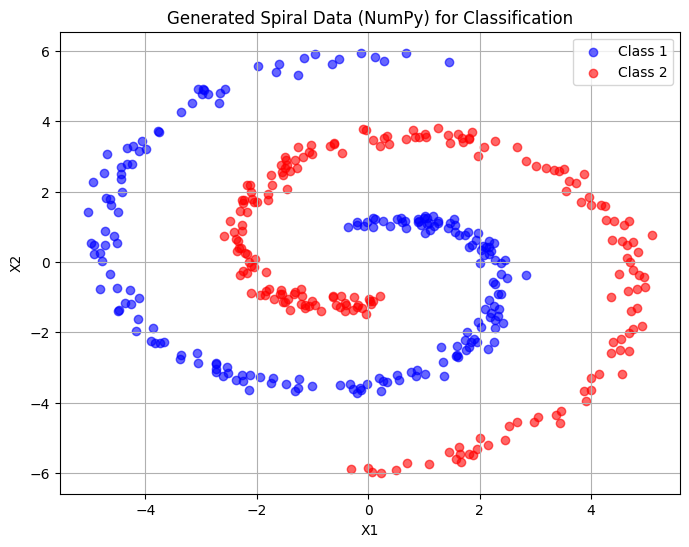

In [3]:

# Generate the spiral data with NumPy
n_points_per_class = 200
X, y = generate_spiral_numpy(n_points_per_class)

# Visualize the NumPy-generated data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 1', alpha=0.6)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 2', alpha=0.6)
plt.title('Generated Spiral Data (NumPy) for Classification')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()


## Create a Neural net

In [ ]:
folder_name = "decision_boundary_images"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
X_transformed = transform_features(X)

# Create the model
model = Sequential()
model.add(Dense(7, input_dim=7, activation='sigmoid'))  # First hidden layer with 7 nodes
model.add(Dense(2, activation='sigmoid'))               # Second hidden layer with 2 nodes
model.add(Dense(1, activation='sigmoid'))            # Output layer for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.007), loss='binary_crossentropy', metrics=['accuracy'])
# Train the model and save the decision boundary image at each epoch
epochs = 200
for epoch in range(epochs):
    model.fit(X_transformed, y, epochs=1, verbose=0)
    plot_decision_boundary(X, y, model, epoch + 1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━